# K-Means with Python

## Hoodmaps / Wards with Python 

### Step 1. Import Libraries 

In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler # this is to scale our data

from sklearn.cluster import KMeans

C:\Users\David\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\David\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\David\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


### Step 2. Load Data

In [2]:
data = pd.read_csv('hoodmaps.csv')

In [3]:
data.head()

,Wards in Hackney,Average Age,Average income
0,Brownswood,33.2,"£48,860.00"
1,Cazenove,29.2,"£46,380.00"
2,Chatham,32.1,"£39,570.00"
3,Clissold,33.6,"£56,050.00"
4,Dalston,32.8,"£46,500.00"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wards in Hackney  19 non-null     object 
 1   Average Age       19 non-null     float64
 2   Average income    19 non-null     object 
dtypes: float64(1), object(2)
memory usage: 584.0+ bytes


In [5]:
data.dtypes

Wards in Hackney     object
Average Age         float64
Average income       object
dtype: object

note the 'object' data type of the income variable - this means a Python string here, so we will want to transform this into a numeric variable

### Step 3. Transform data in Python

In [6]:
# drop the £ and the commas in the income variable

data['Average income'] = data['Average income'].replace('£', '', regex = True)

In [7]:
data['Average income'] = data['Average income'].replace(',', '', regex = True)

In [8]:
data.head()

,Wards in Hackney,Average Age,Average income
0,Brownswood,33.2,48860.00
1,Cazenove,29.2,46380.00
2,Chatham,32.1,39570.00
3,Clissold,33.6,56050.00
4,Dalston,32.8,46500.00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wards in Hackney  19 non-null     object 
 1   Average Age       19 non-null     float64
 2   Average income    19 non-null     object 
dtypes: float64(1), object(2)
memory usage: 584.0+ bytes


In [10]:
data['Average income'] = data['Average income'].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wards in Hackney  19 non-null     object 
 1   Average Age       19 non-null     float64
 2   Average income    19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 584.0+ bytes


In [12]:
data.head()

,Wards in Hackney,Average Age,Average income
0,Brownswood,33.2,48860.0
1,Cazenove,29.2,46380.0
2,Chatham,32.1,39570.0
3,Clissold,33.6,56050.0
4,Dalston,32.8,46500.0


### Step 4. Visualise the Data

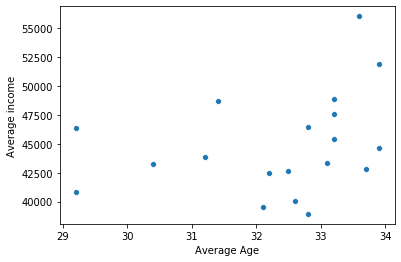

In [13]:
# create a scatterplot of Age vs Income 

sns.scatterplot(x = data['Average Age'], y = data['Average income'])

### Step 5. Modelling with K-Means

In [14]:
# to do the k-means we only want the Age and Income information 

data_new = data.drop(['Wards in Hackney'], axis = 1)

In [15]:
data_new.head()

,Average Age,Average income
0,33.2,48860.0
1,29.2,46380.0
2,32.1,39570.0
3,33.6,56050.0
4,32.8,46500.0


In [16]:
# Normalise: convert both values in range between 0-1 

# to normalise, we use the MinMaxScaler function from sklearn 

data_scaled = MinMaxScaler().fit_transform(data_new)

In [17]:
data_scaled

array([[0.85106383, 0.58002336],
       [0.        , 0.43516355],
       [0.61702128, 0.03738318],
       [0.93617021, 1.        ],
       [0.76595745, 0.4421729 ],
       [0.85106383, 0.50408879],
       [0.95744681, 0.22838785],
       [0.82978723, 0.25876168],
       [0.42553191, 0.28621495],
       [0.63829787, 0.20794393],
       [0.76595745, 0.        ],
       [0.70212766, 0.21728972],
       [0.46808511, 0.57067757],
       [0.25531915, 0.25116822],
       [1.        , 0.33235981],
       [0.        , 0.10981308],
       [1.        , 0.75876168],
       [0.85106383, 0.37850467],
       [0.72340426, 0.06308411]])

In [18]:
# create the KMeans model object with a number of clusters K. 

model = KMeans(n_clusters = 3, random_state = 123)

In [19]:
# fit the model to our scaled data

model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [20]:
# look at the cluster labels from the data points 

model.labels_

array([0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2])

In [21]:
# add a column to the dataframe called 'cluster' which tells us which cluster each data point belongs to 

data['Cluster'] = model.labels_

In [22]:
data.head()

,Wards in Hackney,Average Age,Average income,Cluster
0,Brownswood,33.2,48860.0,0
1,Cazenove,29.2,46380.0,1
2,Chatham,32.1,39570.0,2
3,Clissold,33.6,56050.0,0
4,Dalston,32.8,46500.0,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wards in Hackney  19 non-null     object 
 1   Average Age       19 non-null     float64
 2   Average income    19 non-null     float64
 3   Cluster           19 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 660.0+ bytes


In [24]:
data.groupby('Cluster').mean()

,Average Age,Average income
Cluster,,
0,33.475,51097.5
1,30.280,44590.0
2,32.890,42638.0


In [25]:
# Pull wards in hackney where cluster column is equal 0

data[['Wards in Hackney']][data['Cluster'] == 0]

,Wards in Hackney
0,Brownswood
3,Clissold
5,De Beauvoir
16,Stoke Newington Central


In [26]:
# Pull wards in hackney where cluster column is equal 1

data[['Wards in Hackney']][data['Cluster'] == 1]

,Wards in Hackney
1,Cazenove
8,Haggerston
12,Lordship
13,New River
15,Springfield


In [27]:
# Pull wards in hackney where cluster column is equal 2

data[['Wards in Hackney']][data['Cluster'] == 2]

,Wards in Hackney
2,Chatham
4,Dalston
6,Hackney Central
7,Hackney Downs
9,Hoxton
10,King's Park
11,Leabridge
14,Queensbridge
17,Victoria
18,Wick


In [28]:
data[data['Cluster'] == 0]

,Wards in Hackney,Average Age,Average income,Cluster
0,Brownswood,33.2,48860.0,0
3,Clissold,33.6,56050.0,0
5,De Beauvoir,33.2,47560.0,0
16,Stoke Newington Central,33.9,51920.0,0


### Step 6. Visualise the Clusters

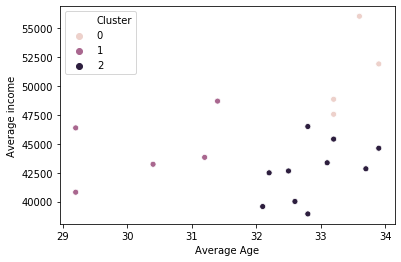

In [29]:
# we want to recreate the scatter plot, but with the data points coloured according to the cluster 

# specify the 'hue' parameter 

sns.scatterplot(x = data['Average Age'], y = data['Average income'], hue = data['Cluster'])

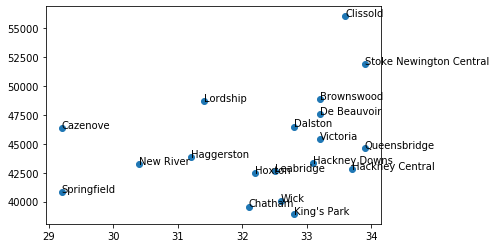

In [30]:
fig, ax = plt.subplots() # creates a canvas / empty plot to fill 
ax.scatter(x = data['Average Age'], y = data['Average income'])

for i, txt in enumerate(data['Wards in Hackney']):
    ax.annotate(txt, (data['Average Age'][i], data['Average income'][i]))

# enumerate supplies a number for each ward 
# the plot uses these numbers to label the points 

In [31]:
# Can use the following code to combine labelling with visual 

# fig, ax = plt.subplots() # creates a canvas / empty plot to fill 
# ax.scatter(x = data['Average Age'], y= data['Average income'], c = data['Cluster'])

# for i, txt in enumerate(data['Wards in Hackney']):
    # ax.annotate(txt, (data['Average Age'][i], data['Average income'][i]))

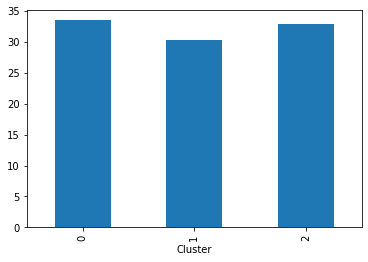

In [32]:
data.groupby('Cluster')['Average Age'].mean().plot(kind = 'bar')

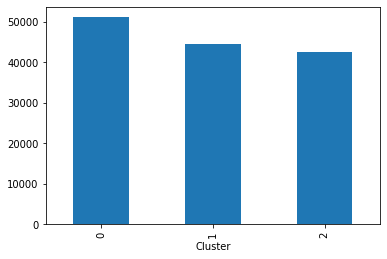

In [33]:
data.groupby('Cluster')['Average income'].mean().plot(kind = 'bar')

### Step 7. Determine the optimal number of clusters K

In [34]:
# idea: perform k-means clustering for various k, and compute the WSS (within cluster sum-of-squares) each time 

# create a list of the different values of k to test 

num_clusters = [1,2,3,4,5,6,7,8,9,10]

# create a k means model for each value of k 

kmeans_list = [KMeans(n_clusters = i) for i in num_clusters]

# for each value of k, fit the model with our data and use the 'inertia' method of KMeans to compute the WSS 

score = [kmeans_list[i-1].fit(data_scaled).inertia_ for i in num_clusters]

# inertia measures how well a dataset was clustered by k-means. It is calcualted by measuring the distance 
# between each data point and its centroid, squaring this distance, and summing these squares accross one cluster.
# A good model is one with low inertia AND a low number of clusters ( K )

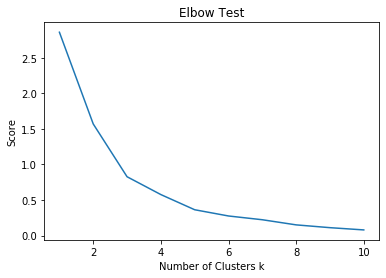

In [35]:
# use the lineplot function from seaborn 

sns.lineplot(num_clusters, score)

# add title and axis labels 
plt.xlabel('Number of Clusters k')
plt.ylabel('Score')
plt.title('Elbow Test')
plt.show()

From the elbow curve, k=3 or k=4 seems to be optimal, as above this (k=5, 6 ...) there is not much reduction in the WSS

In [36]:
# the number where the WSS, the number of errors, starts to level out, is considered the optimal number of clusters 
# with this example from 5 onwards the wss is not changing too much to be relevent

# when we do this test we can repeat the steps that we have done previously, with the optimum number of clusters 

In [37]:
# if you are wanting to further validate your test you can go down the route of clustering silhoutte score and cluster cohesion 